# Thumbtack

Thumbtack is a marketplace for local services. Customers come to see our website or mobile app to see our directory of service professionals in nearly 500 categories. As part of the search experience, customers can provide some basic details about their projects in the search filters to see pros that best match their needs. Customers can also see pros' price estimates for their projects. From the list of pros, customers can then explore pro profiles, contact the pros that interest them, and ultimately hire a pro.

### Investigation

Thumbtack has decided to take a closer look at performance in two categories - House Cleaning and Local Moving. More specifically, our investigation aims to highlight: 
<ul>
    <li>the types of pros our customers are interested in</li>
    <li>how to increase the amount of contact for pros</li>
    <li>recommendations to improve and grow our marketplace</li>
</ul>


In [45]:
#importing libraries
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#read in datasets
contacts = pd.read_csv("Contacts.csv")
visitors = pd.read_csv("Visitors.csv")

After importing the datasets, I like to have a general understanding and feel of the datasets.

In [47]:
#show info and top five rows of contacts
contacts.info()

#converting True/False to 1/0
contacts.hired = contacts.hired.astype(int)
contacts.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 4 columns):
visitor_id     1504 non-null int64
pro_user_id    1504 non-null int64
contact_id     1504 non-null int64
hired          1504 non-null bool
dtypes: bool(1), int64(3)
memory usage: 36.8 KB


,visitor_id,pro_user_id,contact_id,hired
0,339909111505494000,269676229116822000,339909524915273000,0
1,344128984608088000,343705945283207000,344129090535645000,0
2,344283283738624000,198869800397579000,344283629941841000,0
3,342932176648061000,198869800397579000,342932549106393000,0
4,344288410954719000,198869800397579000,344288499619061000,0


In [48]:
#show info and top five rows of visitors
visitors.info()

#converting True/False to 1/0
visitors.service_page_viewed = visitors.service_page_viewed.astype(int)
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26102 entries, 0 to 26101
Data columns (total 11 columns):
row_number                            26102 non-null int64
visitor_id                            26102 non-null int64
search_timestamp                      26102 non-null object
category                              26102 non-null object
pro_user_id                           26102 non-null int64
num_reviews                           26102 non-null int64
avg_rating                            24947 non-null float64
pro_last_active_time_before_search    25035 non-null object
cost_estimate_cents                   23944 non-null float64
result_position                       26102 non-null int64
service_page_viewed                   26102 non-null bool
dtypes: bool(1), float64(2), int64(5), object(3)
memory usage: 2.0+ MB


,row_number,visitor_id,search_timestamp,category,pro_user_id,num_reviews,avg_rating,pro_last_active_time_before_search,cost_estimate_cents,result_position,service_page_viewed
0,15173,344101422347558000,2018-11-26 15:43:43.365 UTC,Local Moving (under 50 miles),343959583718981000,0,NaN,NaN,NaN,6,0
1,8426,344461605879021000,2018-11-30 19:46:46.593 UTC,House Cleaning,344053677817806000,0,NaN,2018-11-29 00:32:46.809 UTC,8900.0,6,0
2,12809,344142189241475000,2018-11-27 03:03:09.969 UTC,House Cleaning,343931062348177000,0,NaN,NaN,10000.0,21,0
3,17310,344215295106097000,2018-11-27 23:21:35.89 UTC,House Cleaning,343931062348177000,0,NaN,NaN,10000.0,22,0
4,10072,344364289304010000,2018-11-29 16:44:50.202 UTC,House Cleaning,343934345272852000,0,NaN,NaN,9000.0,13,0


In [141]:
#DELETE AFTER DONE

example = sum(visitors['visitor_id'] == 344101422347558000)
example

6

## The Types of Pros our Customers are Interested In

To get a sense of what types of pros most people are interested in, I would like to start by grouping the customers from the visitors table on 'category', focusing on the total count of 'num_reviews', 'avg_rating', 'cost_estimate_cents', and 'service_page_viewed'. 

In [49]:
categories = visitors.groupby('category').count()
categories[['num_reviews', 'avg_rating', 'cost_estimate_cents', 'service_page_viewed']]

,num_reviews,avg_rating,cost_estimate_cents,service_page_viewed
category,,,,
House Cleaning,19054,18165,17562,19054
Local Moving (under 50 miles),7048,6782,6382,7048


Initially, we can see that House Cleaning has more total number of reviews, average rating, cost estimate (in cents), and service pages viewed across the board.

Assuming 'visitor_id' is consistent with both Contacts and Visitors, we can join both tables on 'visitor_id' to get analyze the information and relationships from both tables. From this point onwards, we will be using this table for simplicity and to avoid confusion between the other tables. 

Note: One caveat is that by merging both datasets on an inner join (default), we are only taking into consideration the customers that have both visited and contacted a pro.

In [102]:
contactedandvisited = pd.merge(visitors, contacts, on='visitor_id')
contactedandvisited.describe()
#hired

,row_number,visitor_id,pro_user_id_x,num_reviews,avg_rating,cost_estimate_cents,result_position,service_page_viewed,pro_user_id_y,contact_id,hired
count,13080.000000,1.308000e+04,1.308000e+04,13080.000000,12504.000000,11966.000000,13080.000000,13080.000000,1.308000e+04,1.308000e+04,13080.000000
mean,13115.508333,3.424692e+17,2.951566e+17,53.678746,4.676277,11414.524486,7.734174,0.150229,2.842938e+17,3.424703e+17,0.250765
std,7507.738784,1.502895e+15,5.225232e+16,113.502221,0.415458,4536.364981,6.565512,0.357310,5.039058e+16,1.503151e+15,0.433470
min,1.000000,3.392089e+17,4.568943e+16,0.000000,1.000000,100.000000,1.000000,0.000000,7.524120e+16,3.392091e+17,0.000000
25%,6622.750000,3.412598e+17,2.680801e+17,4.000000,4.521127,8900.000000,3.000000,0.000000,2.497537e+17,3.412600e+17,0.000000
50%,13083.500000,3.429369e+17,3.132752e+17,12.000000,4.800000,10000.000000,6.000000,0.000000,2.961652e+17,3.429373e+17,0.000000
75%,19611.250000,3.436836e+17,3.358089e+17,46.000000,5.000000,12500.000000,11.000000,0.000000,3.294527e+17,3.436839e+17,1.000000
max,26093.000000,3.444753e+17,3.443095e+17,997.000000,5.000000,100500.000000,30.000000,1.000000,3.438920e+17,3.444755e+17,1.000000


In [ ]:
"""
analysis of result position relative to service page viewed
analysis of cost relative to page clicked
relate rating to searches
"""

Text(0, 0.5, 'Cost Estimate (in cents)')

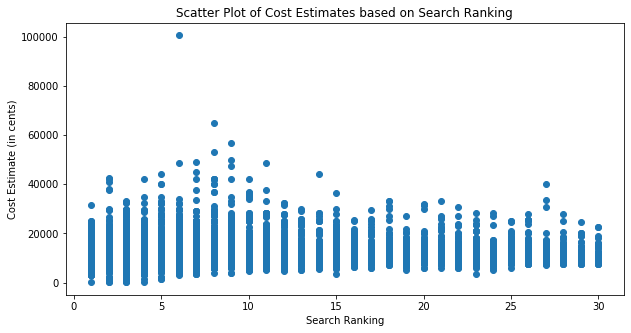

In [100]:
#plt.plot([1, 2, 3, 4], [1, 2, 3, 4])

#plt.pyplot.bar(hired.result_position, hired.hired)
#plt.rcParams['figure.figsize']=(10,5)

plt.scatter(contactedandvisited['result_position'], contactedandvisited['cost_estimate_cents'])
plt.title('Scatter Plot of Cost Estimates based on Search Ranking')
plt.xlabel('Search Ranking')
plt.ylabel('Cost Estimate (in cents)')


To better understand the types of pros that customers are not only interested in (through clicks) but also the ones that are actually hired, the combined dataset is separated into hired and nothired tables for separate analysis. Three metrics that are of particular interest are 'num_reviews', 'avg_rating', 'cost_estimate_cents', and 'result_position'.

In [136]:
#hired
hired = contactedandvisited[contactedandvisited['hired'] == 1]

hired_stats = hired.describe()
hired_stats.loc[['mean', 'std'], ['num_reviews', 'avg_rating', 'cost_estimate_cents', 'result_position']]


,num_reviews,avg_rating,cost_estimate_cents,result_position
mean,56.730488,4.672601,11747.384205,7.672256
std,116.131783,0.418596,4741.306499,6.324427


In [135]:
#not_hired
not_hired = contactedandvisited[contactedandvisited['hired'] == 0]

not_hired_stats = not_hired.describe()
not_hired_stats.loc[['mean', 'std'], ['num_reviews', 'avg_rating', 'cost_estimate_cents', 'result_position']]


,num_reviews,avg_rating,cost_estimate_cents,result_position
mean,52.657347,4.677520,11303.100948,7.754898
std,112.595953,0.414406,4460.387325,6.644435


- ANALYZING FREQUENCY OF CLICKS PER UNIQUE VISITOR TO HIRED

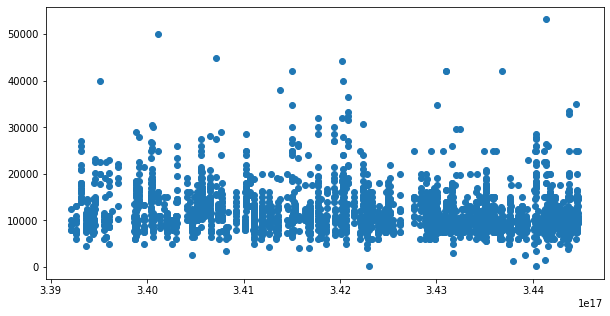

In [143]:
"""
HOW MANY TIMES CLICKED PER VISITOR VS HIRED
FREQUENCY OF CLICKS TO HIRED
"""

plt.scatter(hired['visitor_id'], hired['cost_estimate_cents'])

#analysis of cost relative to page clicked
#plt.bar(hired['service_page_viewed'], hired['cost_estimate_cents'])
#t.show() 

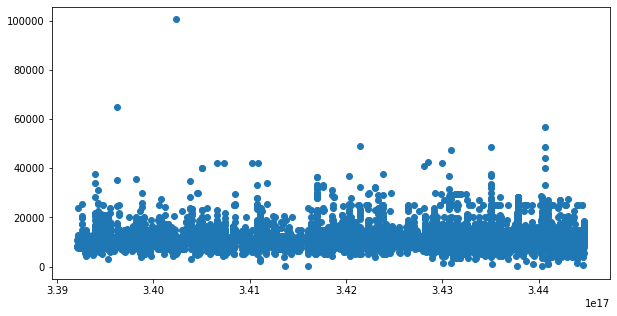

In [145]:
#ranking per visitor vs cost for hired
plt.scatter(not_hired['visitor_id'], not_hired['cost_estimate_cents'])

In [ ]:
"""

analysis on whether there were clicks to hired
analysis of rates to hired

GRAPHS
- cost estimate (x axis) vs hired
- ranking vs clicked
- rating vs clicked

- of those who clicked, how many hired based on pricing? ranking?

"""

## How to Increase Contact for Pros

From our analysis, it is clear that higher search rankings aid pros in finding more customers. It makes logical sense as the top ranking searches are the first ones to be considered and clicked on by customers.

One method I would definitely want to use to increase contact for pros is to analyze the common search history of keywords that customers use for each category using NLP libraries such as spaCy and NLTK. Then, I would want to perform additional analysis of these keywords on the advertisements placed by pros based on SEO.

Another aspect I would like to experiment with is to utilize A/B testing on two separate websites (of the same pro) to differentiate the effectiveness of keyword searches.